<a href="https://colab.research.google.com/github/Rachiesqueek/NPL/blob/main/NLP_ICE_12_Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICE-12
# Text Summarization.
This ICE has 3 three tasks. In the first Task you need to execute the tutorial and get the outputs. Understand the tutorial properly. The second task answer should be given theoratically but you can use code if required. The aim of the task is explain the difference between different type of summarizations. Finally, the third task is about usage of dataset in the tutorial code that is already provided.

# Task 1: (20%)
## In this task your have to run the tutorial properly. All steps should be followed

# Document Summarization

The idea of document summarization is a
bit different from keyphrase extraction or topic modeling. In this case, the end result
is still in the form of some document, but with a few sentences based on the length we
might want the summary to be. This is similar to an abstract or an executive summary
in a research paper. The main objective of automated document summarization is
to perform this summarization without involving human input, except for running
computer programs. Mathematical and statistical models help in building and
automating the task of summarizing documents by observing their content and context.

There are two broad approaches to document summarization using automated
techniques. They are described as follows:
- __Extraction-based techniques:__ These methods use mathematical
and statistical concepts like SVD to extract some key subset of the
content from the original document such that this subset of content
contains the core information and acts as the focal point of the entire
document. This content can be words, phrases, or even sentences.
The end result from this approach is a short executive summary of a
couple of lines extracted from the original document. No new content
is generated in this technique, hence the name extraction-based.
- __Abstraction-based techniques:__ These methods are more complex
and sophisticated. They leverage language semantics to create
representations and use natural language generation (NLG)
techniques where the machine uses knowledge bases and semantic
representations to generate text on its own and create summaries
just like a human would write them. Thanks to deep learning, we can
implement these techniques easily but they require a lot of data and
compute.

We will cover extraction based methods here due to constraints of needed a lot of data + compute for abstraction based methods. 

# Install necessary dependencies

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Get Text Document

We use the description of a very popular role-playing game (RPG) Skyrim from
Bethesda Softworks for summarization. 

In [ ]:
DOCUMENT = """
The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios 
and published by Bethesda Softworks. It is the fifth main installment in The Elder Scrolls series, 
following The Elder Scrolls IV: Oblivion.
The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, 
a dragon who is prophesied to destroy the world. The game is set 200 years after the events of Oblivion 
and takes place in the fictional province of Skyrim. Over the course of the game, the player completes 
quests and develops the character by improving skills. The game continues the open-world tradition of 
its predecessors by allowing the player to travel anywhere in the game world at any time, and to ignore 
or postpone the main storyline indefinitely.
The team opted for a unique and more diverse open world than Oblivion's Imperial Province of Cyrodiil, 
which game director and executive producer Todd Howard considered less interesting by comparison. 
The game was released to critical acclaim, with reviewers particularly mentioning the character advancement 
and setting, and is considered to be one of the greatest video games of all time.


The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or 
third-person perspective. The player may freely roam over the land of Skyrim which is an open world 
environment consisting of wilderness expanses, dungeons, cities, towns, fortresses, and villages. 
Players may navigate the game world more quickly by riding horses or by utilizing a fast-travel system 
which allows them to warp to previously discovered locations. The game's main quest can be completed or 
ignored at the player's preference after the first stage of the quest is finished. However, some quests 
rely on the main storyline being at least partially completed. Non-player characters (NPCs) populate the 
world and can be interacted with in a number of ways: the player may engage them in conversation, 
marry an eligible NPC, kill them or engage in a nonlethal "brawl". The player may 
choose to join factions which are organized groups of NPCs — for example, the Dark Brotherhood, a band 
of assassins. Each of the factions has an associated quest path to progress through. Each city and town 
in the game world has jobs that the player can engage in, such as farming.

Players have the option to develop their character. At the beginning of the game, players create 
their character by selecting their sex and choosing between one of several races including humans, 
orcs, elves, and anthropomorphic cat or lizard-like creatures and then customizing their character's 
appearance. Over the course of the game, players improve their character's skills which are numerical 
representations of their ability in certain areas. There are eighteen skills divided evenly among the 
three schools of combat, magic, and stealth. When players have trained skills enough to meet the 
required experience, their character levels up. Health is depleted primarily when the player 
takes damage and the loss of all health results in death. Magicka is depleted by the use of spells, 
certain poisons and by being struck by lightning-based attacks. Stamina determines the player's 
effectiveness in combat and is depleted by sprinting, performing heavy "power attacks" 
and being struck by frost-based attacks. Skyrim is the first entry in The Elder Scrolls to 
include dragons in the game's wilderness. Like other creatures, dragons are generated randomly in 
the world and will engage in combat with NPCs, creatures and the player. Some dragons may attack 
cities and towns when in their proximity. The player character can absorb the souls of dragons 
in order to use powerful spells called "dragon shouts" or "Thu'um". A regeneration 
period limits the player's use of shouts in gameplay.

Skyrim is set around 200 years after the events of The Elder Scrolls IV: Oblivion, although it is 
not a direct sequel. The game takes place in Skyrim, a province of the Empire on the continent of 
Tamriel, amid a civil war between two factions: the Stormcloaks, led by Ulfric Stormcloak, and the 
Imperial Legion, led by General Tullius. The player character is a Dragonborn, a mortal born with 
the soul and power of a dragon. Alduin, a large black dragon who returns to the land after being 
lost in time, serves as the game's primary antagonist. Alduin is the first dragon created by Akatosh, 
one of the series' gods, and is prophesied to destroy and consume the world.
"""

In [ ]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

# Summarization with Gensim

Let’s look at an implementation of document summarization by leveraging Gensim’s
summarization module. It is pretty straightforward.

In [ ]:
from gensim.summarization import summarize

print(summarize(DOCUMENT, ratio=0.2, split=False))

The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
Over the course of the game, the player completes quests and develops the character by improving skills.
The game continues the open-world tradition of its predecessors by allowing the player to travel anywhere in the game world at any time, and to ignore or postpone the main storyline indefinitely.
The player may freely roam over the land of Skyrim which is an open world environment consisting of wilderness expanses, dungeons, cities, towns, fortresses, and villages.
Each city and town in the game world has jobs that the player can engage in, such as farming.
Over the course of the game, players improve their character's skills which are numerical representations of their ability in certain areas.
Like other creatures, dragons are generated randomly in the world and will engage in combat with NPCs, creatures and the player.


In [ ]:
print(summarize(DOCUMENT, word_count=75, split=False))

The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
Over the course of the game, the player completes quests and develops the character by improving skills.
The player may freely roam over the land of Skyrim which is an open world environment consisting of wilderness expanses, dungeons, cities, towns, fortresses, and villages.


In [ ]:
sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

35

This summarization implementation from Gensim is based on a variation of
a popular algorithm called TextRank. 

# Basic Text pre-processing

In [ ]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['elder scrolls v skyrim action roleplaying video game developed bethesda game studios published bethesda softworks',
       'fifth main installment elder scrolls series following elder scrolls iv oblivion',
       'games main story revolves around player characters quest defeat alduin worldeater dragon prophesied destroy world'],
      dtype='<U183')

# Text Representation with Feature Engineering

We will be vectorizing our normalized sentences using the TF-IDF feature engineering
scheme. We keep things simple and don’t filter out any words based on document
frequency. But feel free to try that out and maybe even leverage n-grams as features.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(270, 35)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
ability,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
absorb,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.0,0.00,0.0,0.0,0.00,0.00
acclaim,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.28,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
action,0.25,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.32,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
advancement,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.28,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
akatosh,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.33
alduin,0.00,0.0,0.25,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.26,0.27
allowing,0.00,0.0,0.00,0.0,0.0,0.27,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
allows,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00
although,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.33,0.0,0.0,0.00,0.00


# Latent Semantic Analysis

Here, we summarize our game description by utilizing document sentences. The
terms in each sentence of the document have been extracted to form the term-document matrix, which we observed in the previous cell. 

We apply low-rank Singular Value Decomposition to this matrix. The core principle behind Latent Semantic Analysis (LSA) is that in any document, there exists a latent structure among terms that are related
contextually and hence should also be correlated in the same singular space.

The main idea in our implementation is to use SVD (recall M = USVT) so that U
and V are the orthogonal matrices and S is the diagonal matrix, which can also be
represented as a vector of the singular values. 

The original matrix can be represented as
a term-document matrix where the rows are terms and each column is a document, i.e.,
a sentence from our document in this case. The values can be any type of weighting like
Bag of Words model-based frequencies, TF-IDFs, or binary occurrences.

![](https://i.imgur.com/YtopNr3.png)

In [ ]:
from scipy.sparse.linalg import svds
    
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

In [ ]:
num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

(270, 3) (3,) (3, 35)


In [ ]:
# remove singular values below threshold                                         
sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

In [ ]:
salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

array([0.53291263, 0.61639562, 0.60427539, 0.52307109, 0.50141128,
       0.32352969, 0.1506046 , 0.25383436, 0.60567083, 0.35902104,
       0.22562997, 0.34608934, 0.15781555, 0.40522541, 0.24505982,
       0.19874104, 0.39317895, 0.45392878, 0.31638528, 0.47353378,
       0.18348908, 0.45731421, 0.13929749, 0.38932101, 0.36829067,
       0.57822992, 0.40853736, 0.26260062, 0.38904585, 0.32776714,
       0.67662776, 0.21866561, 0.34687796, 0.3234621 , 0.46107093])

In [ ]:
top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

In [ ]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

The Elder Scrolls V: Skyrim is an action role-playing video game developed by Bethesda Game Studios and published by Bethesda Softworks.
It is the fifth main installment in The Elder Scrolls series, following The Elder Scrolls IV: Oblivion.
The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
The game is set 200 years after the events of Oblivion and takes place in the fictional province of Skyrim.
Over the course of the game, the player completes quests and develops the character by improving skills.
The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or third-person perspective.
Skyrim is the first entry in The Elder Scrolls to include dragons in the game's wilderness.
Skyrim is set around 200 years after the events of The Elder Scrolls IV: Oblivion, although it is not a direct sequel.


# TextRank

The TextRank summarization algorithm internally uses the popular PageRank
algorithm, which is used by Google for ranking websites and pages. This is used by the
Google search engine when providing relevant web pages based on search queries. To
understand TextRank better, we need to understand some of the concepts surrounding
PageRank. The core algorithm in PageRank is a graph-based scoring or ranking
algorithm, where pages are scored or ranked based on their importance. 

Websites and
pages contain further links embedded in them which link to more pages having more
links and this continues across the Internet. This can be represented as a graph-based
model where vertices indicate the web pages and edges indicate links among them. This
can be used to form a voting or recommendation system such so when one vertex links
to another one in the graph it is basically casting a vote. 

Vertex importance is decided
not only on the number of votes or edges but also the importance of the vertices that are
connected to it and their importance. 

![](https://i.imgur.com/fMyJjUN.png)

We can see that vertex denoting Page C has a higher score than
Page E even if it has fewer edges compared to Page E, because Page B is an important
page connected to Page C.

For textrank we will follow a similar process leveraging pagerank

![](https://i.imgur.com/kkrzeq7.png)

- Tokenize and extract sentences from the document to be
summarized.
- Decide on the number of sentences, k, that we want in the final
summary
- Build a document-term feature matrix using weights like TF-IDF
or Bag of Words.
- Compute a document similarity matrix by multiplying the matrix
by its transpose.
- Use these documents (sentences in our case) as the vertices and
the similarities between each pair of documents as the weight
or score coefficient we talked about earlier and feed them to the
PageRank algorithm.
- Get the score for each sentence.
- Rank the sentences based on score and return the top k sentences.

# Build Similarity Matrix

In [ ]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(35, 35)


array([[1.   , 0.182, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.182, 1.   , 0.05 , ..., 0.   , 0.   , 0.084],
       [0.   , 0.05 , 1.   , ..., 0.101, 0.165, 0.319],
       ...,
       [0.   , 0.   , 0.101, ..., 1.   , 0.066, 0.069],
       [0.   , 0.   , 0.165, ..., 0.066, 1.   , 0.123],
       [0.   , 0.084, 0.319, ..., 0.069, 0.123, 1.   ]])

# Build Similarity Graph

In [ ]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

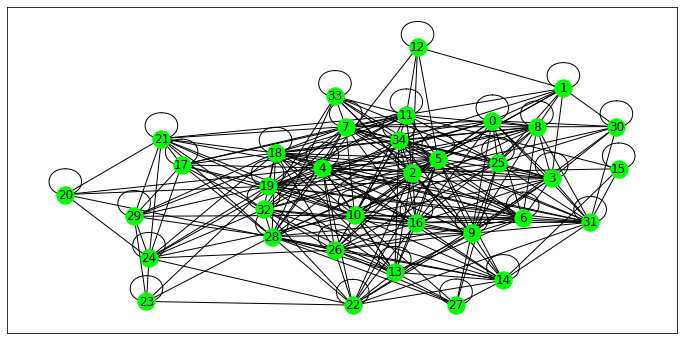

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

# Get Sentence Importance Scores

In [ ]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.037297049797214744, 2),
 (0.034908435475375886, 25),
 (0.03460086870923607, 4),
 (0.03240744530656925, 8),
 (0.03218748996523769, 28),
 (0.031836734268801445, 11),
 (0.031566658693076226, 26),
 (0.03150616293402057, 3),
 (0.031376143577383796, 5),
 (0.031123481531894214, 16)]

In [ ]:
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [ ]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

The game's main story revolves around the player character's quest to defeat Alduin the World-Eater, a dragon who is prophesied to destroy the world.
The game is set 200 years after the events of Oblivion and takes place in the fictional province of Skyrim.
Over the course of the game, the player completes quests and develops the character by improving skills.
The Elder Scrolls V: Skyrim is an action role-playing game, playable from either a first or third-person perspective.
The game's main quest can be completed or ignored at the player's preference after the first stage of the quest is finished.
Skyrim is the first entry in The Elder Scrolls to include dragons in the game's wilderness.
Like other creatures, dragons are generated randomly in the world and will engage in combat with NPCs, creatures and the player.
The player character can absorb the souls of dragons in order to use powerful spells called "dragon shouts" or "Thu'um".


# Task-2: (30%)
Explain the difference between the summarization techniques covered in the section above

TextRank Algortithm extracts words based on frequency while TF-IDF considersthe word frequency relations to the text libary in order to extract keywords.

# Task-3: (50%)
1. Use any other dataset to perform the steps covered in Task-1. (25%)
2. Finally after executing, provide your analysis. (25%)

In [ ]:
document = "Long before Sora was chosen to wield the Keyblade, there was a Keyblade War between thousands of warriors who fought over dominion of the light. In the process, the x-blade, the legendary weapon that protected Kingdom Hearts and was the basis for all Keyblades, was shattered into 20 pieces: seven fragments of pure light, which eventually become the seven princesses' hearts, and thirteen shards of darkness. This war passed down in legend until it became a fairy tale and caught the interest of Xehanort, a Keyblade Master who sought to create a new x-blade and summon Kingdom Hearts. His wild ideas put him at odds with fellow Keyblade Master Eraqus, and the two would part ways to train their own apprentices. For those who have already started Kingdom Hearts 3, a young Xehanort and Eraqus are the two men playing chess while discussing the nature of light and dark. We'll keep coming back to them. The apprentices of Xehanort and Eraqus are the protagonists of the Kingdom Hearts prequel game, Birth By Sleep, and are a major driving force in Kingdom Hearts 3. Terra and Aqua are Eraqus' apprentices, while Ventus is Xehanort's former apprentice who was nearly killed when Xehanort attempted to jumpstart a x-blade by splitting Ventus' heart into its light and dark halves. But Ventus was saved when his heart took refuge with — guess who — baby Sora! Later on, after the three Keyblade apprentices are manipulated into tragic circumstances by Xehanort, Ventus will end up taking up refuge in Sora's heart again. So by the time the first Kingdom Hearts has started, Ventus' heart is dormant inside of Sora's, Aqua is trapped in the realm of darkness, and Terra has been possessed by Xehanort and later takes on the name...Ansem."

print(summarize(document, ratio=0.2, split=False))
sentences = nltk.sent_tokenize(document)

Later on, after the three Keyblade apprentices are manipulated into tragic circumstances by Xehanort, Ventus will end up taking up refuge in Sora's heart again.
So by the time the first Kingdom Hearts has started, Ventus' heart is dormant inside of Sora's, Aqua is trapped in the realm of darkness, and Terra has been possessed by Xehanort and later takes on the name...Ansem.


In [ ]:
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['long sora chosen wield keyblade keyblade war thousands warriors fought dominion light',
       'process xblade legendary weapon protected kingdom hearts basis keyblades shattered pieces seven fragments pure light eventually become seven princesses hearts thirteen shards darkness',
       'war passed legend became fairy tale caught interest xehanort keyblade master sought create new xblade summon kingdom hearts'],
      dtype='<U183')

In [ ]:
tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(112, 11)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2,3,4,5,6,7,8,9,10
already,0.0,0.00,0.00,0.0,0.3,0.0,0.00,0.00,0.0,0.00,0.00
apprentice,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.25,0.0,0.00,0.00
apprentices,0.0,0.00,0.00,0.2,0.0,0.0,0.19,0.17,0.0,0.21,0.00
aqua,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.22,0.0,0.00,0.22
attempted,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.25,0.0,0.00,0.00
baby,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.4,0.00,0.00
back,0.0,0.00,0.00,0.0,0.0,0.5,0.00,0.00,0.0,0.00,0.00
basis,0.0,0.21,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
became,0.0,0.00,0.26,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
become,0.0,0.21,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00


In [ ]:
def low_rank_svd(matrix, singular_count=2):
    u, s, vt = svds(matrix, k=singular_count)
    return u, s, vt

num_sentences = 8
num_topics = 3

u, s, vt = low_rank_svd(td_matrix, singular_count=num_topics)  
print(u.shape, s.shape, vt.shape)
term_topic_mat, singular_values, topic_document_mat = u, s, vt

sv_threshold = 0.5
min_sigma_value = max(singular_values) * sv_threshold
singular_values[singular_values < min_sigma_value] = 0

salience_scores = np.sqrt(np.dot(np.square(singular_values), 
                                 np.square(topic_document_mat)))
salience_scores

top_sentence_indices = (-salience_scores).argsort()[:num_sentences]
top_sentence_indices.sort()

print('\n'.join(np.array(sentences)[top_sentence_indices]))

(112, 3) (3,) (3, 11)
Long before Sora was chosen to wield the Keyblade, there was a Keyblade War between thousands of warriors who fought over dominion of the light.
This war passed down in legend until it became a fairy tale and caught the interest of Xehanort, a Keyblade Master who sought to create a new x-blade and summon Kingdom Hearts.
For those who have already started Kingdom Hearts 3, a young Xehanort and Eraqus are the two men playing chess while discussing the nature of light and dark.
The apprentices of Xehanort and Eraqus are the protagonists of the Kingdom Hearts prequel game, Birth By Sleep, and are a major driving force in Kingdom Hearts 3.
Terra and Aqua are Eraqus' apprentices, while Ventus is Xehanort's former apprentice who was nearly killed when Xehanort attempted to jumpstart a x-blade by splitting Ventus' heart into its light and dark halves.
But Ventus was saved when his heart took refuge with — guess who — baby Sora!
Later on, after the three Keyblade apprentic

(11, 11)


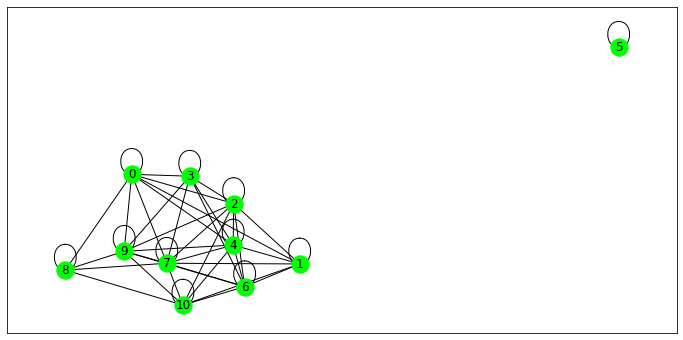

In [ ]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

plt.figure(figsize=(12, 6))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [ ]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

print('\n'.join(np.array(sentences)[top_sentence_indices]))

Long before Sora was chosen to wield the Keyblade, there was a Keyblade War between thousands of warriors who fought over dominion of the light.
This war passed down in legend until it became a fairy tale and caught the interest of Xehanort, a Keyblade Master who sought to create a new x-blade and summon Kingdom Hearts.
For those who have already started Kingdom Hearts 3, a young Xehanort and Eraqus are the two men playing chess while discussing the nature of light and dark.
We'll keep coming back to them.
The apprentices of Xehanort and Eraqus are the protagonists of the Kingdom Hearts prequel game, Birth By Sleep, and are a major driving force in Kingdom Hearts 3.
Terra and Aqua are Eraqus' apprentices, while Ventus is Xehanort's former apprentice who was nearly killed when Xehanort attempted to jumpstart a x-blade by splitting Ventus' heart into its light and dark halves.
Later on, after the three Keyblade apprentices are manipulated into tragic circumstances by Xehanort, Ventus wil